# SU2 bosonic model: Results Processing (using EvolvedOperator)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_last_val(df):
    val_list = []
    name_list = []
    for i in range(len(df.columns)):
        lv = df[df.columns[i]].dropna().to_numpy()[-1]
        val_list.append(np.round(lv,5))
        name_list.append(df.columns[i])
    return name_list, val_list

def plot_e(df, ax):
    for i in range(len(df.columns)):
        ax.plot(np.arange(len(df[df.columns[i]])),df[df.columns[i]],color = color_list[i], 
                 label=df.columns[i])
        

# Load data

In [3]:
df_02= pd.read_csv('results/qve_l2_l0.2_op_ev.csv')
df_05= pd.read_csv('results/qve_l2_l0.5_op_ev.csv')
df_10 =pd.read_csv('results/qve_l2_l1.0_op_ev.csv')
df_20= pd.read_csv('results/qve_l2_l2.0_op_ev.csv')

In [4]:
df_02.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_05.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_10.drop(['Unnamed: 0'], axis = 1, inplace=True)
df_20.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [5]:
df_02_cobyla = df_02[df_02.columns[:9]]
df_02_spsa = df_02[df_02.columns[9:]]

df_05_cobyla = df_05[df_05.columns[:9]]
df_05_spsa = df_05[df_05.columns[9:]]

df_10_cobyla = df_10[df_10.columns[:9]]
df_10_spsa = df_10[df_10.columns[9:]]

df_20_cobyla = df_20[df_20.columns[:9]]
df_20_spsa = df_20[df_20.columns[9:]]

In [6]:
col_names = ['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f',
       'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3',
       'ev_op_Hp4']

In [7]:
df_02_cobyla.columns = col_names
df_02_spsa.columns = col_names
df_05_cobyla.columns = col_names
df_05_spsa.columns = col_names
df_10_cobyla.columns = col_names
df_10_spsa.columns = col_names
df_20_cobyla.columns = col_names
df_20_spsa.columns = col_names

In [8]:
df_02_spsa

,ev_op_r,ev_op_r3,ev_op_H,ev_op_H_2f,ev_op_H_3f,ev_op_Hp,ev_op_Hp2,ev_op_Hp3,ev_op_Hp4
0,5.701563,4.162695,6.316992,7.014453,6.822266,7.149805,6.357031,4.055859,5.944922
1,6.150391,3.802344,6.438281,7.090625,6.230273,6.776367,6.887891,5.069336,6.902539
2,5.728906,4.459570,6.844141,7.103906,5.271289,7.150781,6.620313,4.272852,6.174805
3,6.148633,3.984180,6.179102,6.595898,5.931836,7.042383,6.833984,6.762109,5.607227
4,5.699414,3.181836,5.794727,6.958203,4.195703,7.147656,6.455273,6.020898,6.126172
...,...,...,...,...,...,...,...,...,...
646,3.220117,3.166211,3.335156,3.617188,3.762500,3.320313,3.282031,3.399023,4.028320
647,3.185547,3.152930,3.300977,3.448633,3.593945,3.222070,3.220703,3.354688,3.751953
648,3.217188,3.192773,3.356250,3.838672,3.900781,3.274805,3.528711,3.258398,3.759180
649,3.188477,3.161328,3.273242,3.557813,3.921289,3.242188,3.339453,3.176953,3.808594


# Plotting

In [9]:
E_02 = 3.14808
E_05 = 3.3625
E_10 = 3.69722
E_20 = 4.26795

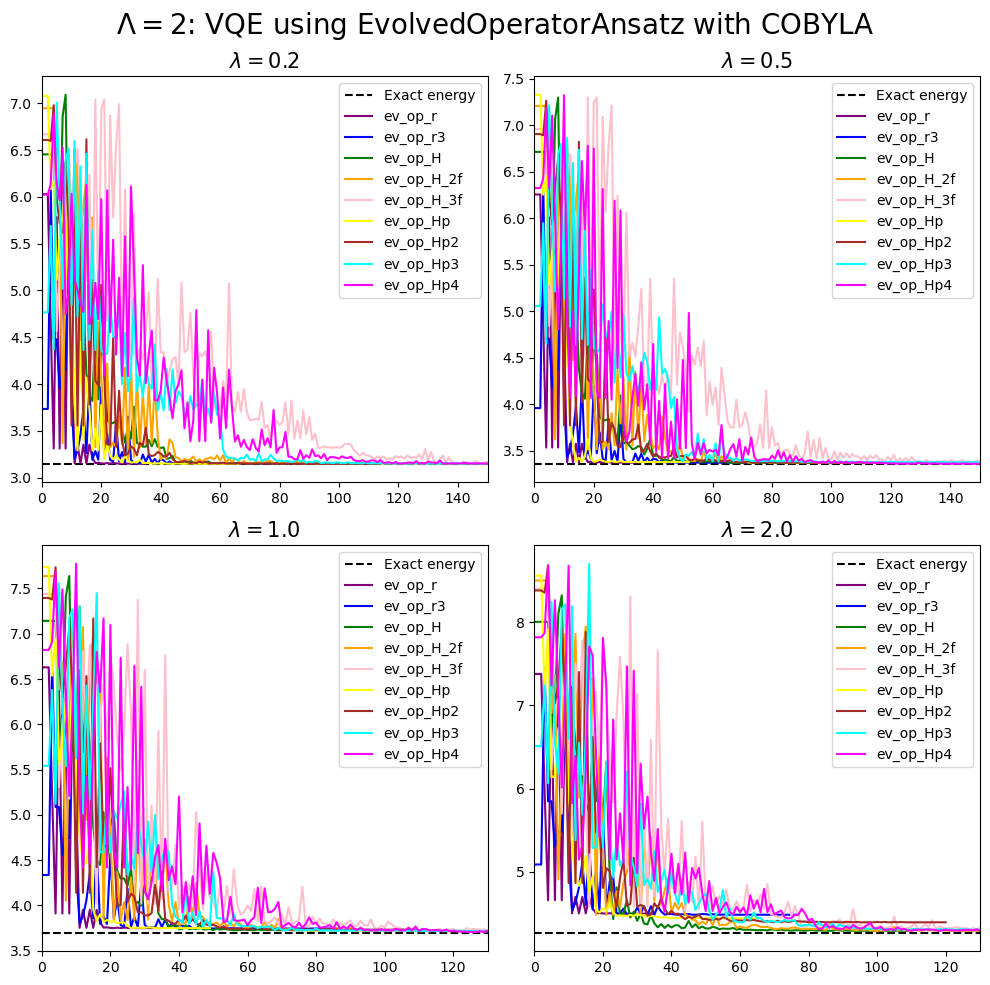

In [24]:
fig, ax = plt.subplots(2,2, figsize=(10,10), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan','magenta']
###################################
ax[0,0].axhline(E_02, color =  'black', linestyle = 'dashed',  label = 'Exact energy')
plot_e(df_02_cobyla, ax[0,0])
ax[0,0].set_xlim([0, 150])
ax[0,0].set_title('$\lambda=0.2$', fontsize = 15)
ax[0,0].legend()

###################################
ax[0,1].axhline(E_05, color =  'black', linestyle = 'dashed',  label = 'Exact energy')
plot_e(df_05_cobyla, ax[0,1])
ax[0,1].set_xlim([0, 150])
ax[0,1].set_title('$\lambda=0.5$', fontsize = 15)
ax[0,1].legend()

###################################
ax[1,0].axhline(E_10, color =  'black', linestyle = 'dashed',  label = 'Exact energy')
plot_e(df_10_cobyla, ax[1,0])
ax[1,0].set_xlim([0, 130])
ax[1,0].set_title('$\lambda=1.0$', fontsize = 15)
ax[1,0].legend()

###################################
ax[1,1].axhline(E_20, color = 'black', linestyle = 'dashed', label = 'Exact energy')
plot_e(df_20_cobyla, ax[1,1])
ax[1,1].set_title('$\lambda=2.0$', fontsize = 15)
ax[1,1].set_xlim([0, 130])
ax[1,1].legend()

###################################
plt.suptitle('$\Lambda=2$: VQE using EvolvedOperatorAnsatz with COBYLA', fontsize = 20)
plt.savefig('L=2_ev_op_convergence_curves_cobyla.png')

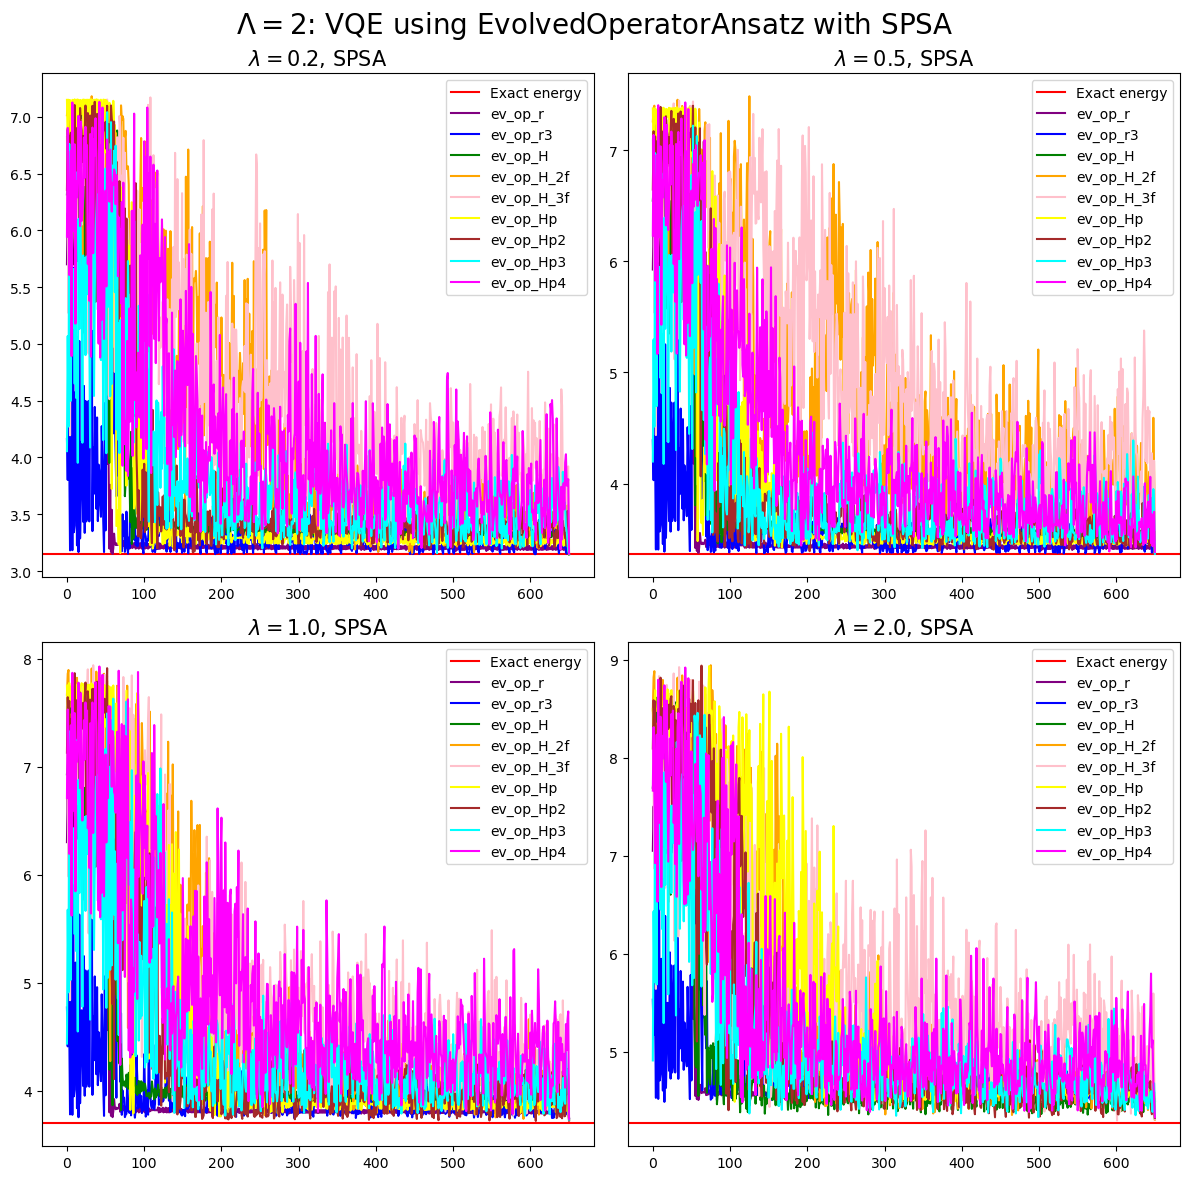

In [27]:
fig, ax = plt.subplots(2,2, figsize=(12,12), tight_layout = True)
color_list = ['purple', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'cyan','magenta']
###################################
ax[0,0].axhline(E_02, color = 'red',  label = 'Exact energy')
plot_e(df_02_spsa, ax[0,0])
ax[0,0].set_title('$\lambda=0.2$, SPSA', fontsize = 15)
ax[0,0].legend()
###################################
ax[0,1].axhline(E_05, color = 'red',  label = 'Exact energy')
plot_e(df_05_spsa, ax[0,1])
ax[0,1].set_title('$\lambda=0.5$, SPSA', fontsize = 15)
ax[0,1].legend()
###################################
ax[1,0].axhline(E_10, color = 'red',  label = 'Exact energy')
plot_e(df_10_spsa, ax[1,0])
ax[1,0].set_title('$\lambda=1.0$, SPSA', fontsize = 15)
ax[1,0].legend()
###################################
ax[1,1].axhline(E_20, color = 'red',  label = 'Exact energy')
plot_e(df_20_spsa, ax[1,1])
ax[1,1].set_title('$\lambda=2.0$, SPSA', fontsize = 15)
ax[1,1].legend()
###################################
plt.suptitle('$\Lambda=2$: VQE using EvolvedOperatorAnsatz with SPSA', fontsize = 20)
plt.savefig('L=2_ev_op_convergence_curves_spsa.png')

# Collate last values

In [28]:
ns1, vs1 = get_last_val(df_02_spsa)
nc1, vc1 = get_last_val(df_02_cobyla)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l02 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l02.set_index('name', inplace = True)

df_l02.to_csv('results/l0.2_last_val.csv')
df_l02

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [3.1498, 3.15117, 3.14668, 3.15488, 3.18848, 3.1498, 3.15371, 3.15254, 3.1543]

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [3.1498, 3.15117, 3.15117, 3.15, 3.14883, 3.14746, 3.14805, 3.14902, 3.14844]



,cobyla_values,spsa_values
name,,
ev_op_r,3.14980,3.14980
ev_op_r3,3.15117,3.15117
ev_op_H,3.15117,3.14668
ev_op_H_2f,3.15000,3.15488
ev_op_H_3f,3.14883,3.18848
ev_op_Hp,3.14746,3.14980
ev_op_Hp2,3.14805,3.15371
ev_op_Hp3,3.14902,3.15254
ev_op_Hp4,3.14844,3.15430


In [29]:
ns1, vs1 = get_last_val(df_05_spsa)
nc1, vc1 = get_last_val(df_05_cobyla)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l05 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l05.set_index('name', inplace = True)

df_l05.to_csv('results/l0.5_last_val.csv')
df_l05

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [3.37451, 3.37354, 3.37158, 3.48877, 3.58252, 3.37451, 3.36816, 3.36719, 3.3833]

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [3.37451, 3.37305, 3.36914, 3.37012, 3.36426, 3.37988, 3.37354, 3.37744, 3.36084]



,cobyla_values,spsa_values
name,,
ev_op_r,3.37451,3.37451
ev_op_r3,3.37305,3.37354
ev_op_H,3.36914,3.37158
ev_op_H_2f,3.37012,3.48877
ev_op_H_3f,3.36426,3.58252
ev_op_Hp,3.37988,3.37451
ev_op_Hp2,3.37354,3.36816
ev_op_Hp3,3.37744,3.36719
ev_op_Hp4,3.36084,3.38330


In [30]:
ns1, vs1 = get_last_val(df_10_spsa)
nc1, vc1 = get_last_val(df_10_cobyla)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l10 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l10.set_index('name', inplace = True)

df_l10.to_csv('results/l1.0_last_val.csv')
df_l10

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [3.74902, 3.74512, 3.72949, 3.73242, 3.72461, 3.73828, 3.72266, 3.73242, 3.73926]

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [3.74902, 3.74414, 3.72656, 3.71484, 3.71387, 3.74902, 3.73242, 3.71582, 3.70508]



,cobyla_values,spsa_values
name,,
ev_op_r,3.74902,3.74902
ev_op_r3,3.74414,3.74512
ev_op_H,3.72656,3.72949
ev_op_H_2f,3.71484,3.73242
ev_op_H_3f,3.71387,3.72461
ev_op_Hp,3.74902,3.73828
ev_op_Hp2,3.73242,3.72266
ev_op_Hp3,3.71582,3.73242
ev_op_Hp4,3.70508,3.73926


In [31]:
ns1, vs1 = get_last_val(df_20_spsa)
nc1, vc1 = get_last_val(df_20_cobyla)
print(f'{ns1}\n {vs1}\n')
print(f'{nc1}\n {vc1}\n')
df_l20 = pd.DataFrame({'name': ns1, 'cobyla_values': vc1, 'spsa_values': vs1})
df_l20.set_index('name', inplace = True)

df_l20.to_csv('results/l2.0_last_val.csv')
df_l20

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [4.49805, 4.48926, 4.31055, 4.30664, 4.30859, 4.44141, 4.32227, 4.34766, 4.33008]

['ev_op_r', 'ev_op_r3', 'ev_op_H', 'ev_op_H_2f', 'ev_op_H_3f', 'ev_op_Hp', 'ev_op_Hp2', 'ev_op_Hp3', 'ev_op_Hp4']
 [4.49805, 4.48535, 4.29297, 4.28906, 4.29102, 4.44141, 4.39453, 4.29883, 4.28906]



,cobyla_values,spsa_values
name,,
ev_op_r,4.49805,4.49805
ev_op_r3,4.48535,4.48926
ev_op_H,4.29297,4.31055
ev_op_H_2f,4.28906,4.30664
ev_op_H_3f,4.29102,4.30859
ev_op_Hp,4.44141,4.44141
ev_op_Hp2,4.39453,4.32227
ev_op_Hp3,4.29883,4.34766
ev_op_Hp4,4.28906,4.33008


# Plot all results

In [34]:
E_02 = 3.14808
E_05 = 3.3625
E_10 = 3.69722
E_20 = 4.26795

In [35]:
df_l02 = pd.read_csv('results/l0.2_last_val.csv')
df_l05 = pd.read_csv('results/l0.5_last_val.csv')
df_l10 = pd.read_csv('results/l1.0_last_val.csv')
df_l20 = pd.read_csv('results/l2.0_last_val.csv')

df_l02.set_index('name', inplace = True)
df_l05.set_index('name', inplace = True)
df_l10.set_index('name', inplace = True)
df_l20.set_index('name', inplace = True)


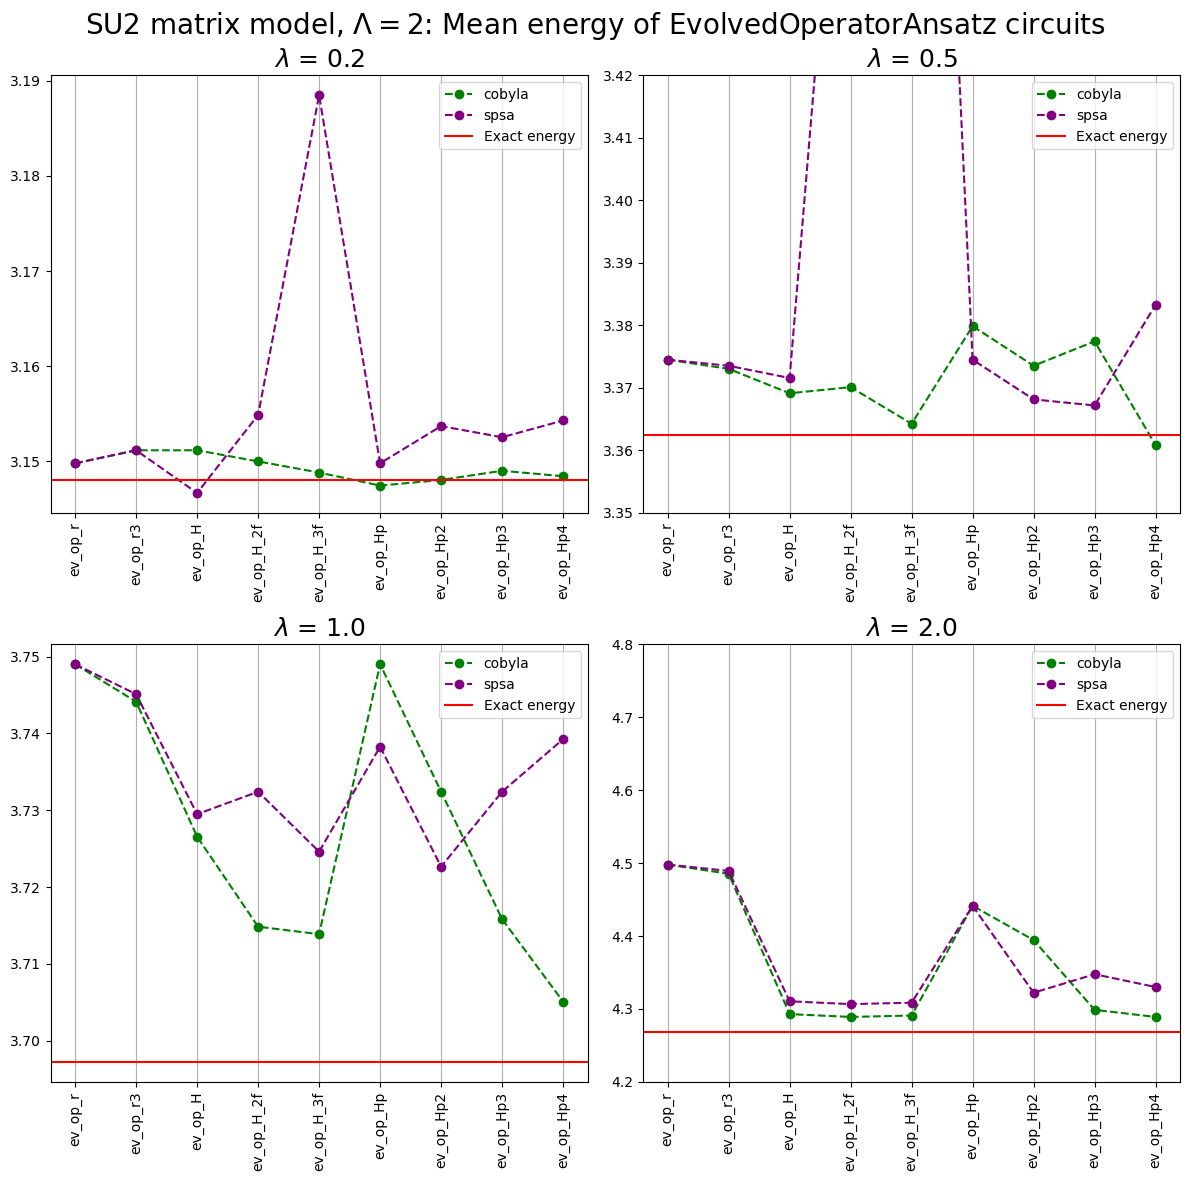

In [36]:
fig, ax = plt.subplots(2,2, figsize = (12,12), tight_layout= True)
ax[0,0].plot(df_l02['cobyla_values'], color='green', marker='o', linestyle='dashed', label='cobyla')
ax[0,0].plot(df_l02['spsa_values'], color='purple', marker='o', linestyle='dashed', label = 'spsa')
ax[0,0].axhline(E_02, color = 'red', label='Exact energy')
for tick in ax[0,0].get_xticklabels():
    tick.set_rotation(90)
ax[0,0].set_title('$\lambda$ = 0.2', fontsize = 18)
ax[0,0].legend()
ax[0,0].xaxis.grid(True)


ax[0,1].plot(df_l05['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[0,1].plot(df_l05['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[0,1].axhline(E_05, color = 'red', label='Exact energy')
for tick in ax[0,1].get_xticklabels():
    tick.set_rotation(90)
ax[0,1].set_title('$\lambda$ = 0.5', fontsize = 18)
ax[0,1].set_ylim([3.35, 3.42])
ax[0,1].xaxis.grid(True)
ax[0,1].legend()

ax[1,0].plot(df_l10['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,0].plot(df_l10['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,0].axhline(E_10, color = 'red', label='Exact energy')
for tick in ax[1,0].get_xticklabels():
    tick.set_rotation(90)
ax[1,0].set_title('$\lambda$ = 1.0', fontsize = 18)
#ax[1,0].set_ylim([3.35, 3.42])
ax[1,0].xaxis.grid(True)
ax[1,0].legend()

ax[1,1].plot(df_l20['cobyla_values'],  color='green', marker='o', linestyle='dashed',label='cobyla')
ax[1,1].plot(df_l20['spsa_values'],  color='purple', marker='o', linestyle='dashed',label = 'spsa')
ax[1,1].axhline(E_20, color = 'red', label='Exact energy')
for tick in ax[1,1].get_xticklabels():
    tick.set_rotation(90)
ax[1,1].set_title('$\lambda$ = 2.0', fontsize = 18)
ax[1,1].set_ylim([4.2, 4.8])
ax[1,1].xaxis.grid(True)
ax[1,1].legend(loc = 'upper right')

plt.suptitle('SU2 matrix model, $\Lambda=2$: Mean energy of EvolvedOperatorAnsatz circuits', fontsize = 20)
plt.savefig('L=2_ev_op_ansatze.png')